<a href="https://colab.research.google.com/github/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/blob/main/Classifica%C3%A7%C3%A3o_de_imagens_com_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obs: O texto se atém ao máximo à língua portuguesa, mas para manter os termos mais frequentemente encontrados na literatura e comunidade, utilizaremos as palavras **input/output** para **entrada/saída** da rede respectivamente, bem como usaremos **dataset** para falar sobre o **conjunto de dados**.

# ***Afinal, por que classificar imagens?***

A classificação de imagens é o primeiro passo para a visão computacional: para humanos e máquinas, rotular as percepções é necessário para compreender o ambiente, e então tomar decisões e ações sob ele.


<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/Observacao.jpg">
</p>

Ao fornecer visão a um computador, juntamente com a habilidade para "compreendê-la", qualquer tarefa visual pode ser automatizada, facilmente superando as capacidades humanas. Já existem vários registros na área médica de tarefas de reconhecimento visual em que inteligências artificiais se saem melhor. Este artigo mostra alguns deles:

*   [Computer Vision Is Transforming Medicine](https://www.linkedin.com/pulse/how-computer-vision-transforming-medicine-margaretta-colangelo/)

Definitivamente, não é apenas na área médica! Gaste apenas um minuto pesquisando na área que mais gostar, e você encontrará aplicações visuais de IA revolucionando-a.








# ***Como classificar uma imagem***

A abordagem do deep learning é treinar uma rede para compreender as diferenças entre algumas classes de imagens.

Para tal, existem várias diferentes arquiteturas de rede neural, incluindo a mais simples de todas: algumas camadas densas [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) com ativação softmax do output para obter as probabilidades diretas de cada classe. Mesmo funcionando, essa abordagem traz consigo diversos problemas:


*   Treino demorado;
*   Baixa performance;
*   Muito enviesado ao dataset;
*   Ignora relações espaciais;
*   Não consegue distinguir entre características diferentes;

&rarr; Para resumir: Uma rede neural padrão não pode resolver problemas reais de visão computacional.

# ***Rede Neural Convolucional (Convolutional Neural Network - CNN)***

O núcleo dos algoritmos modernos de visão computacional é a **Rede Neural Convolucional** ou **CNN**. A razão para isso é o modo como ela "compreende" cada imagem: não apenas um vetor de números, mas várias características hierárquicas e espaciais.


<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/feature_levels.png">
</p>

Sim, isso faz toda a diferença. A rede não irá simplesmente extrair a distribuição dos dados, mas a distribuição de suas característica e suas relações espaciais, o que é bem mais próximo do que os humanos fazem.

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/almost_human.gif">
</p>

Portanto, se duas imagens compartilham várias características, elas provavelmente pertencem à mesma classe. Isso permite que a rede lide muito bem com vários possíveis problemas:


*   Variação de ângulo;
*   Condições de iluminação;
*   Variações de tamanho;
*   Deformação;
*   Oclusão;
*   Fundo variado e confuso;
*   Variações intra-classe;


## ***A operação de convolução***

Lembre-se da ideia chave: compreender características ao invés de apenas pixels. Mas como uma rede faz isso? Ela utiliza da operação convolucional, que é implementado através da camada [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

Primeiramente, ao invés de conectar todo input a um neurônio da camada, conectamos apenas uma parcela, chamada *patch*:

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/pacote.jpg">
</p>

Os pacotes são capturados por uma janela deslizante que se desloca de *n* em *n* pixels para selecionar os demais pacotes. '*n*' é um parâmetro da camada.

Isso permite que cada neurônio capture apenas uma única parte da imagem, e através dos pesos associados a ele, transformar este míni-imagem numa representação de alguma característica. A característica a ser reconhecida depende dos pesos, e por conta disso, o conjunto de pesos é chamado de filtro. Um único filtro aplicado a todos os pacotes é chamado de **operação convolucional** e tem como produto um **mapa de característica** ou **feature map**.

Aplicar diferentes filtros captura diferentes características, como pontos claros, pontos escuros, linhas horizontais, linhas verticais, etc. Ao fazer isso, geramos um **mapa de característica** para cada característica desejada: um volume de imagens ou um cubo de dados.

Logo, a dimensão do output da camada convolucional será (**n**, **m**, **f**), sendo **n**x**m** a dimensão da imagem, e **f** o número de características desejadas.

### *Função de ativação*

Para lidar com dados não lineares, precisamos de ativações não lineares. A mais usada é a ReLu ('rectified linear unit' ou unidade retificadora linear). Essa ativação retorna o próprio número caso este seja positivo, e zero caso seja negativo.

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/relu.png" width=500>
</p>



## ***A operação de "pooling" ou agrupamento***

Para lidar com variações de tamanho, a operação de agrupamento é responsável por reduzir a dimensionalidade de seu input, comprimindo as representações das características. Essa operação requer uma ordem de redimensionamento, ex.:

*   Se a ordem for 4, o **mapa de característica** será particionado de 4 em 4 pixels, onde cada partição será transformada em apenas um pixel após a operação.

Uma operação de pooling muito utilizada é a **Max Pooling**: para cada partição, considere a maior. Isso é implementado pela camada [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/pooling.png" width=500>
</p>


## ***Melhoramentos***

Podemos treinar mais rapidamente e até obter melhores resultados aplicando algumas melhorias a nossa rede. Neste projeto em específico usarei duas:

*   [tf.keras.layers.BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)
*   [tf.keras.layers.Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)





### *Batch Normalization*

Enquanto treinamos nossa rede, a distribuição dos dados muda ao longo das camadas e ao longo do processo de treinamento. Podemos normalizar o dataset, mas dentro da rede isso será bem diferente. Para resolver isso podemos normalizar os valores internamente. A normalização dos valores internos da rede proporciona um treinamento mais rápido, menos ruidoso, e diminui as chances de sobreajuste (overfitting).
 
A camada normalização de pacote (batch normalization) é essa solução de normalização interna. Ela normaliza seu input com média zero e desvio padrão igual a um (μ=0,σ=1). Ela pode ser colocada ao longo da sequência em muitos lugares como veremos abaixo.


<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/normalizacao_batch.png" width=500>
</p>



### *Dropout*

Durante o treinamento, uma camada pode aprender tentando corrigir os erros das camadas anteriores, o que resulta em camadas não operando como deveriam. Isso significa que a rede está memorizando os dados, isto é, super-ajustando (overfitting).
 
Uma técnica muito usado para evitar isso é a **camada de dropout**. Ela determina que os neurônios de uma camada tem uma probabilidade de serem desativados durante o treinamento:

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/dropout.gif" width=500>
</p>


As consequências são:

1.   Como sempre existem alguns neurônios desativados, o restante deles precisa tomar responsabilidade pelos resultados da rede;
2.   Como os neurônios inativos sempre mudam, cada neurônio acaba por tomar responsabilidade pelo resultado;

Usar camadas de dropout requer maior tempo de treinamento mas ajuda a rede a ser mais generalista (não sobreajustar).





## ***Entrega de resultados***

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/deliver_results.gif">
</p>

As operações de convolução e pooling podem ser repetidas (CONV->POOL->CONV->POOL->...CONV->POOL->) para formar o que é chamado de porção de **aprendizado de características**. No entanto, como utilizar essas representações das características da imagem para prever sua classe?
 
Agora que estamos atuando sob as características ao invés de apenas pixels, podemos usar camadas densas para gerar a distribuição de probabilidade de cada classe. A [ativação softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) da última camada densa nos dará um número entre 0 e 1 para cada classe, sendo a probabilidade prevista para a mesma. Logo, podemos tomar o argmax (posição do valor mais alto) como a classe prevista pela rede.

# ***Implementação***

Antes mesmo de começar o projeto, vá até a opção de Ambiente de execução na barra de opções e altere o ambiente de execução para GPU, o que acelera as operações computacionais. Depois disso, vamos importar e configurar nossos pacotes:

In [1]:
# Especificando a versão do tensorflow
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Configurando o formato das figuras
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Mudando o estilo das figuras
plt.style.use('fivethirtyeight')

## ***O dataset: fashion MNIST***

**Fashion MNIST** é um dataset padrão para deep learning em visão computacional. **MNIST** é um dataset muito conhecido de dígitos escritos a mão, e o **Fashion MNIST** é sua "versão com roupas".
 
Ele contém 70 mil imagens de 10 diferentes classes, onde 60 mil são para treinamento e 10 mil para teste. As classes são:

Label | Classe 
--- | --- 
0 | Camiseta/top
1 | Calça
2 | Suéter
3 | Vestido
4 | Casaco
5 | Sandália
6 | Camisa
7 | Tênis
8 | Bolsa
9 | Bota

E se parecem com isso:

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/dataset_view.png" width=400>
</p>

Podemos carregar o dataset diretamente de [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets):



4423680/4422102 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0 193 228 218 213 198
  180 212 210 211 213 223 220 243 202   0]
 [  0   0   0   0   0   0   0   0   0   1   3   0  12 219 220 212 218 192
  169 227 208 218 224 212 226 197 209  52]
 [  0   0   0   0   0   0   0   0   0   0   6   0  99 244 222 220 218 203
  198 221 215 213 222 220 245 119 167  56]
 [  0   0   0   0   0   0   0   0   0   4   0   0  55 236 228 230 228 240
  232 213 218 223 234 217 217 209  92   0]
 [  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
  222 221 216 223 229 215 218 255  77   0]]


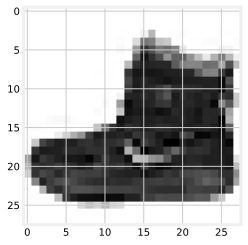

In [2]:
(X_treino, y_treino), (X_teste, y_teste) = tf.keras.datasets.fashion_mnist.load_data()

# Podemos observar a imagem e seu array correspondente
plt.imshow(X_treino[0], cmap=plt.cm.binary)
print(X_treino[0][10:][:5])  # uma fatia da imagem

## ***Pré-processamento dos dados***

O dataset já está limpo e balanceado. Portanto não precisamos trabalhar nesses tópicos. Porém, podemos ver que os dados estão na escala de (0, 255). Tal magnitude pode divergir o processo de treino, o que pode ser facilmente resolvido normalizando os dados. Outra preparação necessária é mudar o tipo dos dados para float32 ao invés de float64 (o padrão) devido aos requisitos do TensorFlow.

In [3]:
X_treino = (X_treino/255.).astype("float32")
X_teste = (X_teste/255.).astype("float32")

Para injetar nossos dados na rede, precisamos que estes estejam no formato quadridimensional que o TensorFlow requer:

```
(Número de instâncias, largura, altura, canais)
```

O que em nosso caso é:

```
(Número de instâncias, 28, 28, 1)
```


In [4]:
X_treino = X_treino.reshape((X_treino.shape[0], 28, 28, 1))
X_teste = X_teste.reshape((X_teste.shape[0], 28, 28, 1))

## ***O modelo***

Agora devemos reunir tudo que falamos sobre e construir o modelo. Esse projeto usará uma versão adaptada da arquitetura VGGNet, desenhada por [Adrian Rosebrook](https://www.linkedin.com/in/adrian-rosebrock-59b8732a/). Vejamos como ela se parece:

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/model_architecture.png" width=1000>
</p>

Por simplicidade e melhor entendimento, construiremos o modelo com o [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential):







In [5]:
modelo = tf.keras.Sequential()

# Primeiro conjunto de convoluções e poolings
modelo.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))
modelo.add(tf.keras.layers.BatchNormalization(axis=1))
modelo.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization(axis=1))
modelo.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
modelo.add(tf.keras.layers.Dropout(0.25))

# Segundo conjunto de convoluções e poolings
modelo.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization(axis=1))
modelo.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization(axis=1))
modelo.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
modelo.add(tf.keras.layers.Dropout(0.25))

# Conjunto de classificação
modelo.add(tf.keras.layers.Flatten())
modelo.add(tf.keras.layers.Dense(512, activation='relu'))
modelo.add(tf.keras.layers.BatchNormalization())
modelo.add(tf.keras.layers.Dropout(0.5))
modelo.add(tf.keras.layers.Dense(10, activation='softmax'))  # 10 neuronios pois temos 10 classes

Vamos dar uma olhada na estrutura do modelo.

In [6]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

Agora já podemos compilar nosso modelo, escolhendo nosso otimizador e função de perda (loss function):


*   Como mantivemos os labels (y_treino e y_teste) com valores inteiros, precisamos utilizar a função de perda [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy)
*   Um bom otimizador a ser tentado é o [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam), mas sinta-se livre para utilizar outro. Você pode encontrar a lista completa de possíveis otimizadores no [site do TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/).

In [7]:
modelo.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

O último passo é o treinamento da rede em si, chamado de ajuste do modelo, ou "model fitting".

In [8]:
historico = modelo.fit(X_treino, y_treino, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5028 - accuracy: 0.8266 - val_loss: 0.4793 - val_accuracy: 0.8379
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3280 - accuracy: 0.8805 - val_loss: 0.2786 - val_accuracy: 0.9019
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2906 - accuracy: 0.8960 - val_loss: 0.2329 - val_accuracy: 0.9153
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2715 - accuracy: 0.9027 - val_loss: 0.2773 - val_accuracy: 0.9082
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2492 - accuracy: 0.9112 - val_loss: 0.2285 - val_accuracy: 0.9194
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2326 - accuracy: 0.9156 - val_loss: 0.2223 - val_accuracy: 0.9190
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2193 - accuracy: 0.9204 - val_loss: 0.2026 - val_accuracy:

## ***Avaliação dos resultados***

Para observar a performance do treinamento, podemos plotar a lista 'historico' retornada pela função fit().

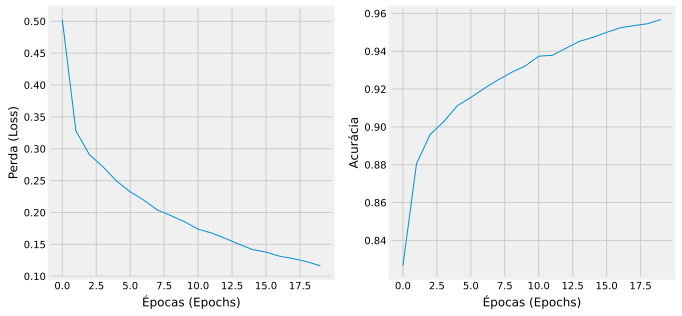

In [9]:
loss = historico.history['loss']
acc = historico.history['accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(loss, lw=1)
ax[0].set_xlabel('Épocas (Epochs)')
ax[0].set_ylabel('Perda (Loss)')
ax[1].plot(acc, lw=1)
ax[1].set_xlabel('Épocas (Epochs)')
ax[1].set_ylabel('Acurácia')
plt.show();

Aparentemente, nossa rede aprendeu bem sua tarefa. No entanto, precisamos avaliar seus resultados em um conjunto de imagens que ela nunca viu antes: o conjunto de testes. Para tal, precisamos prever as classes do conjunto *X_teste* e comparar essas previsões com *y_teste*.

In [10]:
y_pred = modelo.predict(X_teste)

# Como cada previsão é um vetor de probabilidades,
# precisamos pegar o argmax para termos as classes previstas de fato
y_pred = np.argmax(y_pred, axis=1)

# Podemos visualizr melhor a performance usando 'classification_report'
categorias_nomeadas = ['Camiseta/top',
                       'Calça',
                       'Suéter',
                       'Vestido',
                       'Casaco',
                       'Sandália',
                       'Camisa',
                       'Tênis',
                       'Bolsa',
                       'Bota']

print(classification_report(y_teste, y_pred, target_names=categorias_nomeadas))


              precision    recall  f1-score   support

Camiseta/top       0.91      0.88      0.89      1000
       Calça       0.99      0.99      0.99      1000
      Suéter       0.93      0.88      0.90      1000
     Vestido       0.94      0.95      0.95      1000
      Casaco       0.86      0.93      0.90      1000
    Sandália       0.99      0.99      0.99      1000
      Camisa       0.81      0.80      0.81      1000
       Tênis       0.96      0.98      0.97      1000
       Bolsa       0.99      0.99      0.99      1000
        Bota       0.99      0.96      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Alcançamos 94% de acurácia, o que significa que em 94% do tempo, nossa rede neural consegue dizer que roupa ela vê na imagem. A rede aprendeu de fato a identificar nossas classes, INCRÍVEL.

Não é o céu, mas é bem perto, então celebremos.

<p align="center">
<img src="https://raw.githubusercontent.com/RodrigoMarquesP/Image_classification_with_CNNs_using_VGGNet/main/files/celebration.gif">
</p>